Análisis de la especie de tiburón: examinar las especies de tiburones implicadas en los ataques para entender cuáles son las más agresivas y peligrosas para los seres humanos. ¿Es realmente el tiburón blanco el más peligroso? ¿Cual es el porcentaje de tiburones que atacan respecto al total de especies del mundo? ¿que porcentaje de tiburones ha atacado siendo provocado?

Analizar el perfil de las personas que han sido atacadas por las distintas especies de tiburones por género.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('data/attacks.csv', encoding='latin')

In [2]:
#modificamos todas las letras a minúsculas
df= df.applymap(lambda x: x.lower() if type(x) == str else x)

    # Eliminar las filas con valores NaN en la columna species2
    df2.dropna(subset=['species2'], inplace=True)
    #deletting anything that's not a letter
    df2['species2'] =df2['species2'].apply(lambda x: re.sub(r'\W+', ' ', x))
    #It searches for any numeric character (\d) followed by an optional character (.) and removes it
    df2['species2'] = df2['species2'].apply(lambda x: re.sub(r'\d.?', '', x, flags=re.IGNORECASE))
    
    

In [3]:
#modificamos los espacios blancos en los titulos de las las columnas por añadimos _
df.columns = [i.lower().replace(" ", "_") for i in df.columns]

In [4]:
#drops all rows from DataFrame "df" that contain all missing values (NaN)
df = df.dropna(how='all')

In [5]:
#eliminamos duplicados
df= df.drop_duplicates()  

In [6]:
#creamos una copia del df princpal
df1=df.copy()

In [7]:
 #eliminamos las columnas indicadas del df1
df1.drop(['case_number', 'date', 'year', 'area', 'location', 'activity', 'name','investigator_or_source','pdf','href_formula', 'href', 'case_number.1', 'case_number.2', 'unnamed:_22','unnamed:_23' ], axis=1, inplace=True)

In [8]:
#creamos una copia de la columna species
df1['species2']=df1['species_'].copy()

In [9]:
#eliminamos todas las filas de las columnas indicadas con duplicados
df1.drop_duplicates() 

,type,country,sex_,age,injury,fatal_(y/n),time,species_,original_order,species2
0,boating,usa,f,57,"no injury to occupant, outrigger canoe and pad...",n,18h00,white shark,6303.0,white shark
1,unprovoked,usa,f,11,minor injury to left thigh,n,14h00 -15h00,NaN,6302.0,NaN
2,invalid,usa,m,48,injury to left lower leg from surfboard skeg,n,07h45,NaN,6301.0,NaN
3,unprovoked,australia,m,NaN,minor injury to lower leg,n,NaN,2 m shark,6300.0,2 m shark
4,provoked,mexico,m,NaN,lacerations to leg & hand shark provoked incident,n,NaN,"tiger shark, 3m",6299.0,"tiger shark, 3m"
...,...,...,...,...,...,...,...,...,...,...
6305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,NaN
6306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN


In [10]:
df1.dropna(subset=['type', 'fatal_(y/n)', 'species2'], how='all', inplace=True)

In [11]:
df1.rename(columns={'species_': 'species', 'fatal_(y/n)':'fatality', 'sex_' : 'sex'}, inplace=True)

In [12]:
df3= df1.copy()
df3.sample()

,type,country,sex,age,injury,fatality,time,species,original_order,species2
4687,unprovoked,usa,m,NaN,calf nipped in each case,n,NaN,"""small sharks""",1616.0,"""small sharks"""


In [13]:
df3.dropna(subset=['species2'], how='all', inplace=True)


In [14]:
Species_unique= []
for i in df3['species2'].unique():
    Species_unique.append(i)


In [15]:
len(Species_unique)

1535

In [16]:
Species_values= []
for i in df3['species2'].values:
    Species_values.append(i)


In [17]:
len(Species_values)

3464

In [18]:
import re

In [19]:
#df3['species2'] = df3['species'].apply(lambda x: re.sub(r'\d+|[^\w]*shark[^\w]*', '', x, flags=re.IGNORECASE))


In [20]:
#deletting anything that's not a letter
df3['species2'] = df3['species2'].apply(lambda x: re.sub(r'\W+', ' ', x))

In [21]:
Species2_values= []
for i in df3['species2'].values:
    Species2_values.append(i)


In [22]:
len(Species2_values)

3464

In [23]:
#It searches for any numeric character (\d) followed by an optional character (.) and removes it
df3['species2']=df3['species2'].apply(lambda x: re.sub(r'\d.?', '', x, flags=re.IGNORECASE))

In [24]:
#ok
shark_not_involved = df3['species2'] == 'Shark involvement prior to death unconfirmed'
df3 = df3.drop(df3[shark_not_involved].index)

In [25]:
#ok
shark_not_involved2 = df3['species2'] == 'Shark involvement prior to death not confirmed'
df3 = df3.drop(df3[shark_not_involved2].index)

In [26]:
#ok
shark_not_involved3 = df3['species2'] =='Shark involvement suspected but not confirmed'
df3 = df3.drop(df3[shark_not_involved3].index)

In [27]:
#ok
shark_not_involved4 = df3['species2'] =='shark involvement not confirmed'
df3 = df3.drop(df3[shark_not_involved4].index)

In [28]:
#ok
invaled = df3['species2'] =='Invalid'
df3 = df3.drop(df3[invaled].index)

In [29]:
Species2_values= []
for i in df3['species2'].values:
    Species2_values.append(i)
len(Species2_values)

3374

In [30]:
Species_unique2= []
for i in df3['species2'].unique():
    Species_unique2.append(i)


In [31]:
len(Species_unique2)

905

In [32]:
df3.sample()

,type,country,sex,age,injury,fatality,time,species,original_order,species2
1894,unprovoked,south africa,m,NaN,no injury,n,NaN,"mako shark, 2 m [6.75']",4409.0,mako shark m


In [33]:
#elimina las letras m y a si se encuentran entre espacios
df3['species2'] = df3['species2'].str.replace(r'\s[m|a]\s', ' ', regex=True)

In [34]:
Species_unique2= []
for i in df3['species2'].unique():
    Species_unique2.append(i)


In [35]:
len(Species_unique2)

860

In [36]:
# ok
df3['species2'] = df3['species2'].str.replace(r'^m|a\s', '', regex=True)

In [37]:
# ok
df3['species2'] = df3['species2'].str.replace(r'\sm|as$', '', regex=True)

LIMPIEZA NOMBRE ESPECIE

In [38]:
mask_white = df3['species2'].str.contains('white shark|whites', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_white, 'species2'] = 'white shark'

In [39]:
mask_nurse = df3['species2'].str.contains('nurse|nurses', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_nurse, 'species2'] = 'nurse shark'

In [40]:
mask_tiger = df3['species2'].str.contains('tiger|tigers', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_tiger, 'species2'] = 'tiger shark'

In [41]:
mask_grey = df3['species2'].str.contains('grey|greys|gray', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_grey, 'species2'] = 'grey reef shark'

In [42]:
mask_wobbegong = df3['species2'].str.contains('wobbegong|wobbegongs', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_wobbegong, 'species2'] = 'wobbegong shark'

In [43]:
mask_bull = df3['species2'].str.contains('bull|bulls' , case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_bull, 'species2'] = 'bull shark'

In [44]:
mask_blacktip = df3['species2'].str.contains('blacktip|blacktips|black tipped', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_blacktip, 'species2'] = 'blacktip shark'

In [45]:
mask_hammerhead = df3['species2'].str.contains('hammerhead|hammerheads', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_hammerhead, 'species2'] = 'hammerhead shark'

In [46]:
mask_mako = df3['species2'].str.contains('Mako|Makos', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_mako, 'species2'] = 'mako shark'


In [47]:
mask_mako2 = df3['species2'].str.contains('ako|Akos', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_mako2, 'species2'] = 'mako shark'


In [48]:
mask_lemon = df3['species2'].str.contains('lemon|lemons', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_lemon, 'species2'] = 'lemon shark'


In [49]:
mask_largeako = df3['species2'].str.contains('largeako|largeakos', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_largeako, 'species2'] = 'largeako shark'


In [50]:
mask_oceanic_whitetip = df3['species2'].str.contains('oceanic whitetip|oceanic whitetips', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_oceanic_whitetip, 'species2'] = 'oceanic whitetip shark'

In [51]:
mask_oceanic_whitetip2 = df3['species2'].str.contains('whtietip|white tipped|whitetip reef', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_oceanic_whitetip2, 'species2'] = 'whitetip reef shark'


In [52]:
mask_bronze_whaler = df3['species2'].str.contains('bronze whaler|bronze whalers|bronze whale|Copper' , case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_bronze_whaler, 'species2'] = 'bronze whaler shark'

In [53]:
mask_spinner = df3['species2'].str.contains('spinner|spinners', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_spinner, 'species2'] = 'spinner shark'

In [54]:
mask_caribbean_reef = df3['species2'].str.contains('caribbean reef|caribbean reefs', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_caribbean_reef, 'species2'] = 'caribbean reef shark'


In [55]:
mask_blue_pointer = df3['species2'].str.contains('blue pointer|blue pointers', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_blue_pointer, 'species2'] = 'blue shark'

In [56]:
mask_blue_shark = df3['species2'].str.contains('blue shark|blue sharks', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_blue_shark, 'species2'] = 'blue shark'

In [57]:
mask_blue_shark2 = df3['species2'].str.contains('blue nose', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_blue_shark2, 'species2'] = 'blue shark'

In [58]:
mask_bull = df3['species2'].str.contains('bull|bull sharks', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_bull, 'species2'] = 'bull shark'

In [59]:
mask_brown = df3['species2'].str.contains('brown|brown sharks', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_brown, 'species2'] = 'sandbar shark'

In [60]:
mask_sandbar = df3['species2'].str.contains('sand|sandbar', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_sandbar, 'species2'] = 'sandbar shark'

In [61]:
mask_zambezi = df3['species2'].str.contains('zambezi|zambesi', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_zambezi, 'species2'] = 'bull shark'


In [62]:
mask_raggedtooth = df3['species2'].str.contains('raggedtooth', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_raggedtooth, 'species2'] = 'raggedtooth shark'

In [63]:
mask_dogfish = df3['species2'].str.contains('dog|dogfish', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_dogfish, 'species2'] = 'dogfish shark'

In [64]:
mask_unidentified= df3['species2'].str.contains('unidentified|unknown', case=False)

# Reemplazar las palabras en las filas seleccionadas
df3.loc[mask_unidentified, 'species2'] = 'unidentified shark'

ELIMINAR PALABRAS DE DOS LETRAS

In [65]:
#ELIMINAR PALABRAS DE DOS LETRAS
df3['species2'] = df3['species2'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

In [66]:
#ELIMINAR LAS FILAS QUE EN TYPE PONGA INVALID
invalid= df3['type'] =='invalid'
df3 = df3.drop(df3[invalid].index)

In [67]:
df3.type.value_counts()

type
unprovoked      2235
provoked         412
boating          136
boat             112
sea disaster      33
questionable       1
Name: count, dtype: int64

In [68]:
#startswith shark

In [69]:
Species_unique2= []
for i in df3['species2'].unique():
    Species_unique2.append(i)
Species_unique2

['white shark',
 'shark',
 'tiger shark',
 'lemon shark',
 'bull shark',
 'grey reef shark',
 'nurse shark',
 'questionable',
 'wobbegong shark',
 'blacktip shark',
 'galapagos shark',
 'small shark',
 'blue shark',
 'cookiecutter shark',
 'spinner shark',
 'porbeagle',
 'oceanic whitetip shark',
 'seven gill shark',
 'shark probably smooth hound',
 'caribbean reef shark',
 'broadnose sevengill shark',
 'reef shark',
 'angel shark',
 'dogfish shark',
 'mako shark',
 'bronze whaler shark',
 'silky shark',
 'hammerhead shark',
 'juvenile shark',
 'foot shark',
 'raggedtooth shark',
 'shark involvement prior death still determined',
 'goblin shark',
 'etre shark',
 'sandbar shark',
 'cow shark',
 'gill shark',
 'whitetip reef shark',
 'salmon shark',
 'small sharks',
 'porbeagle shark',
 'small reef shark',
 'port jackson shark',
 'sevengill shark',
 'thresher shark',
 'thought involve cookie cutter shark',
 'dusky shark',
 'starry smoothhound shark',
 'basking shark',
 '',
 'small spotte

In [70]:
len(Species_unique2)

160

In [71]:
# ok
species_counts= {}
for i,x in df3['species2'].value_counts().items():
    species_counts[i]=x


In [72]:
species_counts

{'shark': 801,
 'white shark': 628,
 'tiger shark': 283,
 'bull shark': 208,
 'blacktip shark': 104,
 'nurse shark': 97,
 'bronze whaler shark': 69,
 'mako shark': 53,
 'blue shark': 52,
 'wobbegong shark': 49,
 'hammerhead shark': 48,
 'small shark': 47,
 'raggedtooth shark': 43,
 'lemon shark': 34,
 'sandbar shark': 30,
 'grey reef shark': 29,
 'oceanic whitetip shark': 24,
 'spinner shark': 21,
 'unidentified shark': 16,
 'caribbean reef shark': 16,
 'reef shark': 13,
 'sharks': 11,
 'dogfish shark': 10,
 '': 10,
 'sevengill shark': 9,
 'dusky shark': 7,
 'whitetip reef shark': 7,
 'carpet shark': 7,
 'basking shark': 7,
 'angel shark': 6,
 'small sharks': 6,
 'galapagos shark': 6,
 'porbeagle shark': 5,
 'juvenile shark': 5,
 'said involve shark': 5,
 'silky shark': 4,
 'gill shark': 4,
 'whaler shark': 4,
 'pack sharks': 4,
 'shark seen vicinity': 4,
 'thresher shark': 3,
 'foot shark': 3,
 'said shark': 2,
 'possibly leuc': 2,
 'two sharks': 2,
 'shark involvement probable': 2,
 

In [73]:
# ok
for key, value in dict(species_counts).items():
    if value < 6:
        species_counts.pop(key)

species_counts.keys()

dict_keys(['shark', 'white shark', 'tiger shark', 'bull shark', 'blacktip shark', 'nurse shark', 'bronze whaler shark', 'mako shark', 'blue shark', 'wobbegong shark', 'hammerhead shark', 'small shark', 'raggedtooth shark', 'lemon shark', 'sandbar shark', 'grey reef shark', 'oceanic whitetip shark', 'spinner shark', 'unidentified shark', 'caribbean reef shark', 'reef shark', 'sharks', 'dogfish shark', '', 'sevengill shark', 'dusky shark', 'whitetip reef shark', 'carpet shark', 'basking shark', 'angel shark', 'small sharks', 'galapagos shark'])

In [74]:
df4=df3.copy()

In [75]:
df4

,type,country,sex,age,injury,fatality,time,species,original_order,species2
0,boating,usa,f,57,"no injury to occupant, outrigger canoe and pad...",n,18h00,white shark,6303.0,white shark
3,unprovoked,australia,m,NaN,minor injury to lower leg,n,NaN,2 m shark,6300.0,shark
4,provoked,mexico,m,NaN,lacerations to leg & hand shark provoked incident,n,NaN,"tiger shark, 3m",6299.0,tiger shark
6,unprovoked,brazil,m,18,fatal,y,late afternoon,tiger shark,6297.0,tiger shark
7,unprovoked,usa,m,52,minor injury to foot. provoked incident,n,NaN,"lemon shark, 3'",6296.0,lemon shark
...,...,...,...,...,...,...,...,...,...,...
6276,unprovoked,belize,m,16,fatal,y,NaN,12' tiger shark,27.0,tiger shark
6293,unprovoked,australia,m,NaN,"fatal, knocked overboard by tail of shark & ca...",y,NaN,blue pointer,10.0,blue shark
6294,unprovoked,australia,m,NaN,fatal,y,NaN,blue pointer,9.0,blue shark
6295,unprovoked,australia,m,NaN,fatal,y,NaN,blue pointers,8.0,blue shark


In [76]:
df4.dropna(subset=['species2'], how='all', inplace=True)

In [77]:
species_counts2= {}
for i,x in df4['species2'].value_counts().items():
    species_counts2[i]=x
    
for key, value in dict(species_counts2).items():
    if value < 6:
        species_counts2.pop(key)
    
species_list = list(species_counts2.keys())

In [78]:
species_list.pop(0)

'shark'

In [79]:
species_list.remove('')

In [80]:
species_list.remove('sharks')

In [81]:
species_list

['white shark',
 'tiger shark',
 'bull shark',
 'blacktip shark',
 'nurse shark',
 'bronze whaler shark',
 'mako shark',
 'blue shark',
 'wobbegong shark',
 'hammerhead shark',
 'small shark',
 'raggedtooth shark',
 'lemon shark',
 'sandbar shark',
 'grey reef shark',
 'oceanic whitetip shark',
 'spinner shark',
 'unidentified shark',
 'caribbean reef shark',
 'reef shark',
 'dogfish shark',
 'sevengill shark',
 'dusky shark',
 'whitetip reef shark',
 'carpet shark',
 'basking shark',
 'angel shark',
 'small sharks',
 'galapagos shark']

In [82]:
df4 = df4[df4['species2'].isin(species_list)]
df4.isnull().sum()

type                0
country             4
sex               157
age               613
injury              4
fatality            2
time              737
species             0
original_order      0
species2            0
dtype: int64

In [83]:
df4.drop(['age', 'time'], axis=1, inplace=True)

C:\Users\pagob\AppData\Local\Temp\ipykernel_10504\2971522852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(['age', 'time'], axis=1, inplace=True)


In [84]:
df4['species2'].value_counts()

species2
white shark               628
tiger shark               283
bull shark                208
blacktip shark            104
nurse shark                97
bronze whaler shark        69
mako shark                 53
blue shark                 52
wobbegong shark            49
hammerhead shark           48
small shark                47
raggedtooth shark          43
lemon shark                34
sandbar shark              30
grey reef shark            29
oceanic whitetip shark     24
spinner shark              21
unidentified shark         16
caribbean reef shark       16
reef shark                 13
dogfish shark              10
sevengill shark             9
whitetip reef shark         7
dusky shark                 7
basking shark               7
carpet shark                7
angel shark                 6
small sharks                6
galapagos shark             6
Name: count, dtype: int64

***LIMPIEZA COLUMNA FATALITY***

In [85]:
df4['fatality'].value_counts()

fatality
n          1617
y           293
unknown      12
 n            3
m             1
2017          1
Name: count, dtype: int64

In [86]:
#modificamos los datos de la columna fatality
mask_unknown = (df4['fatality'] == '2017')

In [87]:
# Reemplazar las palabras en las filas seleccionadas
df4.loc[mask_unknown, 'fatality'] = 'unknown'

In [88]:
#modificamos los datos de la columna fatality
mask_no = (df4['fatality'] == ' n')

In [89]:
# Reemplazar las palabras en las filas seleccionadas
df4.loc[mask_no, 'fatality'] = 'n'

In [90]:
#modificamos los datos de la columna fatality
mask_unknown2 = (df4['fatality'] == 'm')

In [91]:
# Reemplazar las palabras en las filas seleccionadas
df4.loc[mask_unknown2, 'fatality'] = 'unknown'

In [92]:
df4['sex'].value_counts()

sex
m      1570
f       199
m         1
lli       1
n         1
Name: count, dtype: int64

In [93]:
df4['sex']=df4['sex'].str.replace(r'm\s', 'm', regex=True)

C:\Users\pagob\AppData\Local\Temp\ipykernel_10504\1651844470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['sex']=df4['sex'].str.replace(r'm\s', 'm', regex=True)


In [94]:
df4['sex']=df4['sex'].str.replace(r'n', 'unknown', regex=True)

C:\Users\pagob\AppData\Local\Temp\ipykernel_10504\2255273193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['sex']=df4['sex'].str.replace(r'n', 'unknown', regex=True)


In [95]:
df4['sex']=df4['sex'].str.replace(r'lli', 'unknown', regex=True)

C:\Users\pagob\AppData\Local\Temp\ipykernel_10504\841491761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['sex']=df4['sex'].str.replace(r'lli', 'unknown', regex=True)


In [96]:
df4['sex'].value_counts()

sex
m          1571
f           199
unknown       2
Name: count, dtype: int64

***VISUALIZATION***

In [97]:
#creamos un df con la variable especies y fatality
df5 = df4.loc[:, ['species2', 'fatality']]
df5.rename(columns={'species2': 'species'}, inplace=True)

In [98]:
#modificamos los datos de la columna fatality por integers
no_fatality = (df5['fatality'] == 'n')
# Reemplazar las palabras en las filas seleccionadas
df5.loc[no_fatality, 'fatality'] = 0

In [99]:
#modificamos los datos de la columna fatality por integers
yes_fatality = (df5['fatality'] == 'y')
# Reemplazar las palabras en las filas seleccionadas
df5.loc[yes_fatality, 'fatality'] = 1

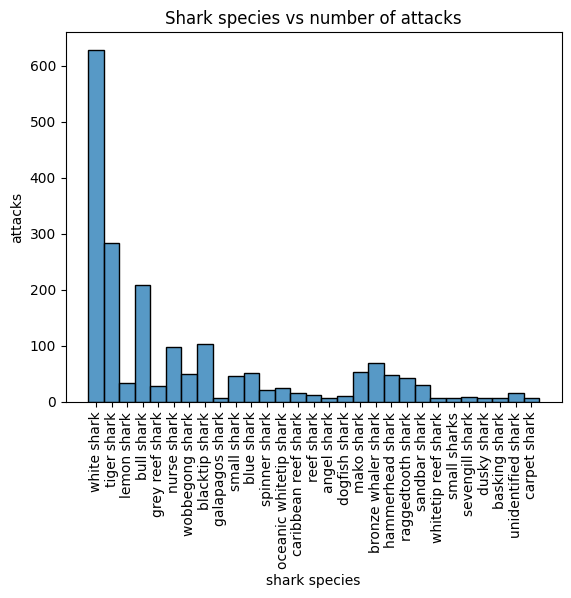

In [100]:
sns.histplot(x=df5['species'])
plt.xticks(rotation=90)
plt.title('Shark species vs number of attacks')
plt.xlabel('shark species')
plt.ylabel('attacks')

plt.show()

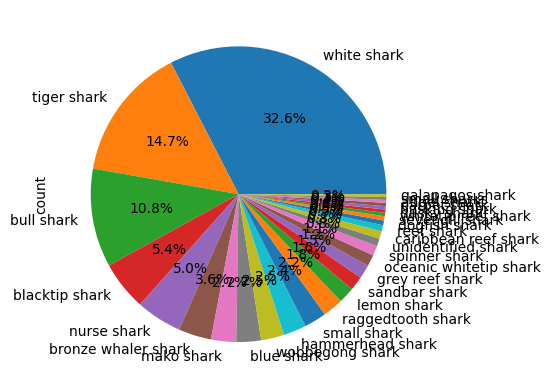

In [101]:
sharks = df5["species"].value_counts()
sharks.plot.pie(autopct="%.1f%%");


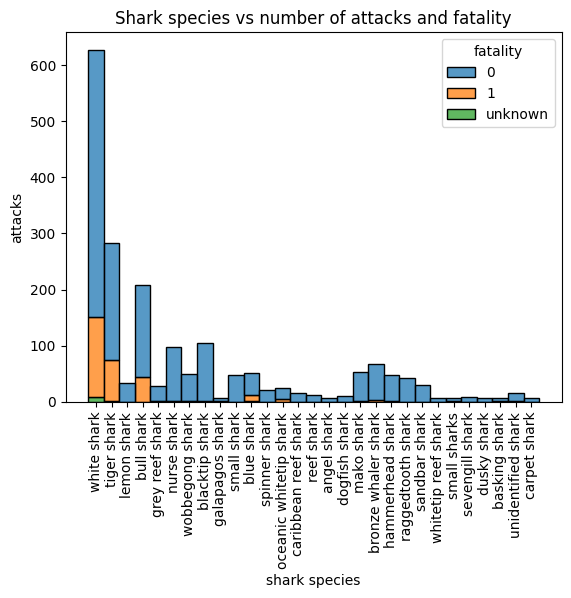

In [148]:
sns.histplot(data=df5, x="species", hue="fatality", multiple="stack")
plt.xticks(rotation=90);
plt.title('Shark species vs number of attacks and fatality')
plt.xlabel('shark species')
plt.ylabel('attacks');

#ordenar
#quitar unknown
#

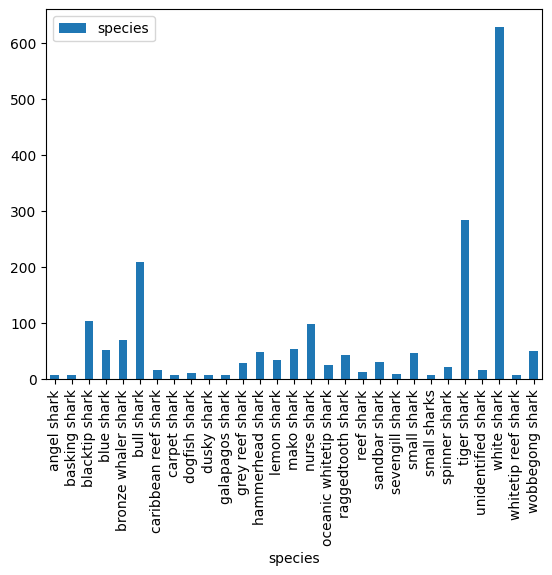

In [141]:
df5.groupby("species")[["species", "fatality"]].agg({"species":"count"}).plot(kind="bar");

In [128]:
# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
df = df5.groupby('species')[["species", "fatality"]].count().reset_index()
print(df)
# bar chart 1 -> top bars (group of 'smoker=No')
sns.barplot(x="species",  y="fatality", data=df, color='darkblue')

plt.show()

ValueError: cannot insert species, already exists

In [115]:
df5

,species,fatality
0,white shark,0
4,tiger shark,0
6,tiger shark,1
7,lemon shark,0
8,bull shark,0
...,...,...
6276,tiger shark,1
6293,blue shark,1
6294,blue shark,1
6295,blue shark,1


In [116]:
df5.groupby("species").agg("count")

,fatality
species,
angel shark,6
basking shark,7
blacktip shark,104
blue shark,52
bronze whaler shark,68
bull shark,208
caribbean reef shark,16
carpet shark,7
dogfish shark,10
